In [1]:
!pip install graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [2]:
df = pd.read_csv("data/diabetes.csv")

In [3]:
correlations = []
for column in df.columns:
    correlation = df[column].corr(df["Diabetes_binary"])
    correlations.append(correlation)
correlations = np.abs(np.array(correlations))
sorted_most_correlated = df.columns[correlations.argsort()[::-1]][1:]

In [4]:
best_k_features = sorted_most_correlated[:15]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [6]:
scalar = StandardScaler()
X = scalar.fit_transform(df[best_k_features])
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Logistic Regression

In [8]:
parameters = {'penalty':['l1','l2'], 'C':[0.001,1,1000]}
logistic = GridSearchCV(LogisticRegression(solver='liblinear',max_iter=1000), parameters)
logistic.fit(X_train, y_train)
print(logistic.best_params_)

{'C': 0.001, 'penalty': 'l2'}


In [9]:
logistic.score(X_test, y_test)

0.7528820991583564

In [10]:
logistic = LogisticRegression(solver='liblinear',max_iter=1000, penalty="l2", C=0.001)
logistic.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=1000, solver='liblinear')

In [11]:
for i in range(len(best_k_features)):
    print(best_k_features[i] + ": " + str(logistic.coef_[0][i]))

GenHlth: 0.5492418615475884
HighBP: 0.35123563135012936
BMI: 0.47668488845753343
HighChol: 0.28364629862335444
Age: 0.3716143486581911
DiffWalk: 0.05900814422038223
Income: -0.10876423201613951
PhysHlth: -0.04853844463037835
HeartDiseaseorAttack: 0.10984292081995625
Education: -0.05879835291069874
PhysActivity: -0.028954124142627515
Stroke: 0.045051389870515164
CholCheck: 0.17485174609881496
HvyAlcoholConsump: -0.14183008691631765
MentHlth: -0.035575024855776995


## Decision Tree

In [13]:
parameters = {'criterion':['gini','entropy','log_loss'], 'max_depth':[3,5,10,15], 'max_leaf_nodes':[10,30,50]}
decision = GridSearchCV(DecisionTreeClassifier(), parameters)
decision.fit(X_train, y_train)
print(decision.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 50}


In [14]:
decision.score(X_test, y_test)

0.7429804087983591

In [39]:
decision = DecisionTreeClassifier(criterion="entropy", max_depth=10, max_leaf_nodes=50)
decision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50)

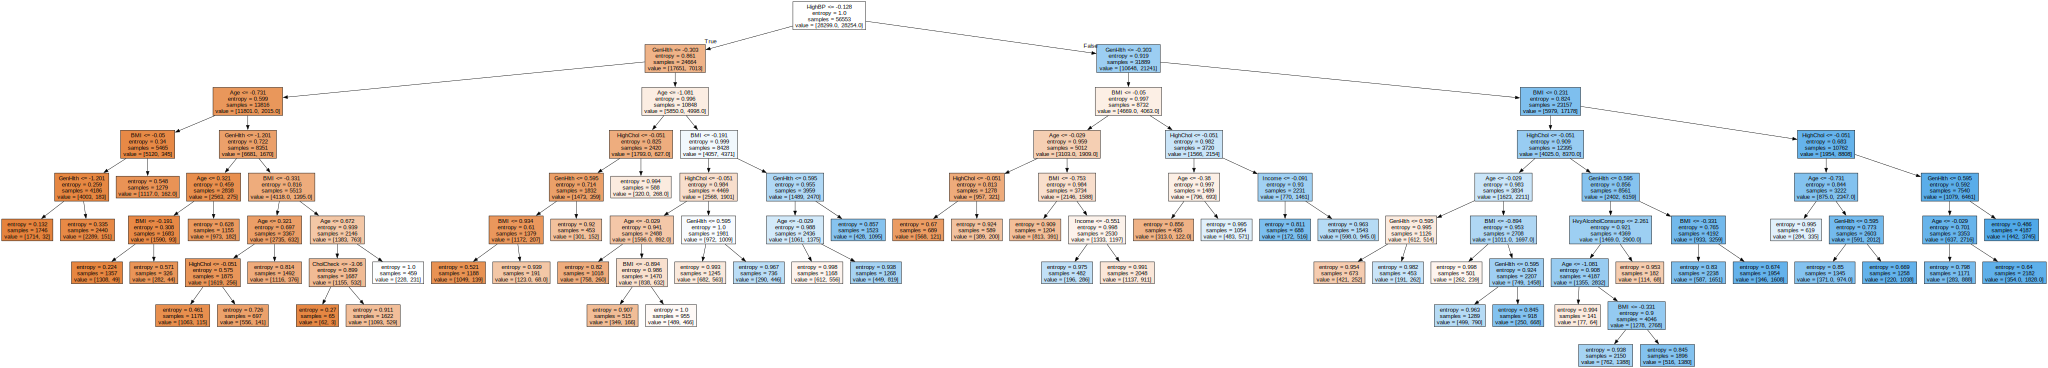

In [40]:
dot_data = export_graphviz(decision, feature_names = sorted_most_correlated[:15], filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

In [41]:
for i in range(len(best_k_features)):
    print(best_k_features[i] + ": " + str(decision.feature_importances_[i]))

GenHlth: 0.3120521659004943
HighBP: 0.4303268525218175
BMI: 0.100063259850358
HighChol: 0.04871305037018031
Age: 0.09991379987518426
DiffWalk: 0.0
Income: 0.00391131882824383
PhysHlth: 0.0
HeartDiseaseorAttack: 0.0
Education: 0.0
PhysActivity: 0.0
Stroke: 0.0
CholCheck: 0.0015736068610988268
HvyAlcoholConsump: 0.0034459457926229497
MentHlth: 0.0


## Random Forest

In [19]:
parameters = {'criterion':['gini','entropy','log_loss'], 'n_estimators':[10,100,200]}
randomForest = GridSearchCV(RandomForestClassifier(), parameters)
randomForest.fit(X_train, y_train)
print(randomForest.best_params_)

{'criterion': 'log_loss', 'n_estimators': 200}


In [20]:
randomForest.score(X_test, y_test)

0.7321592757620765

In [49]:
randomForest = RandomForestClassifier(criterion="log_loss", n_estimators=200)
randomForest.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=200)

In [50]:
for i in range(len(best_k_features)):
    print(best_k_features[i] + ": " + str(randomForest.feature_importances_[i]))

GenHlth: 0.0977397224985758
HighBP: 0.06527493178594618
BMI: 0.21477308661073108
HighChol: 0.034490446380236385
Age: 0.1517297746364565
DiffWalk: 0.023472439051349606
Income: 0.10688276371872368
PhysHlth: 0.08946536406303564
HeartDiseaseorAttack: 0.018478308238893473
Education: 0.07132552356163388
PhysActivity: 0.02537144873111742
Stroke: 0.011677850667889242
CholCheck: 0.00718604840513429
HvyAlcoholConsump: 0.01085357695869133
MentHlth: 0.0712787146915854
